# Assigment 4: Data Analysis and Visualization

Use as many Python and markdown cells per question as you deem necessary. **DO NOT SUBMIT CODE THAT DOES NOT RUN.** You will lose points for code that throws errors. 

The data you will work with was taken from [Alaskan vegetation plots](https://daac.ornl.gov/ABOVE/guides/Arrigetch_Peaks_Veg_Plots.html) from 1978-1981. The data set is in the `data/` subdirectory in this repo in two .csv files containing information about research plots and the plant species covering the plots. **Please read the descriptions for the data, as they will help you answer the questions.** 

**Table 1: Data files**
| Data File Name |	Description |
| --- | --- |
| Arrigetch_Peaks_Environmental_Data.csv| Environmental characterization data for Arrigetch Peaks research plots |
| Arrigetch_Peaks_Species_Data.csv | Species cover data for Arrigetch Peaks research plots|

**Table 2. Arrigetch_Peaks_Environmental_Data.csv**
| Column Name	| Units	| Description |
| --- | --- | --- |
| TURBOVEG_PLOT_NUMBER	 |	 | TURBOVEG plot number |
| PLANT_COMMUNITY_NAME	|  |	Primary vegetation types |
| ELEVATION |	m	| Elevation of the plots |
| ASPECT	| deg	| Aspect of the plots |
| SLOPE	| deg	| Slope of the plots |
| COVER_LITTER_LAYER	| % |	Percentage of litter layer cover in the plot |
|COVER_OPEN_WATER	| % | 	Percentage of open water cover in the plot |
| COVER_ROCK	| % |	Percentage of rock cover in the plot |
| COVER_CRUST	| % |	Percentage of crust cover in the plot |
| COVER_BARE_SOIL	| % |	Percentage of bare soil cover in the plot|
| REMARKS	 |  |	Field notes |

**Table 3. Arrigetch_Peaks_Species_Data.csv**
| Column Name	| Units	| Description |
| --- | --- | --- |
| TURBOVEG_PLOT_NUMBER	 |	 | TURBOVEG plot number |
| species name | | data values are Species Cover Classes: where r (rare), + (common, but less than 1% cover), 1 (1-5 percent), 2 (6 to 25%), 3 (25 to 50%), 4 (51 to 75%), 5 (76 to 100%). |

## Question 1: Pandas (15 pt)

Load the two data sets into Python with Pandas. Name the environmental data frame `env`, and the species data frame `species`. Display the first few rows of each data frame. What are the dimensions of the two data frames? (2 pt)

Replace all values in both data frames that are `-9999` with `np.NaN`. (1 pt)

Print how many unique plant community names there are. (1 pt)

Print summary statistics for all numerical columns in `env`, excluding `"TURBOVEG_PLOT_NUMBER"`. (2 pt)

Merge the two data frames together by the column `TURBO_PLOT_NUMBER`. (1 pt)

How many rows in the merged data frame contain missing data? (1 pt)

Which species was present in the most plots? (3 pt)

For all rows in `species`, calculate the sum of all the columns (excluding `"TURBOVEG_PLOT_NUMBER"`) for each row. Add this sum as a new column called `"totals"`. (2 pt)

Read the description included above for the `species` data frame. Are there any inconsistencies between the description and the data? Explain. If there are inconsistences, what would you do to correct them? (2 pt)

In [4]:
import pandas as pd
import numpy as np



env = pd.read_csv("/Users/gabit/OneDrive/Desktop/Spring 2023/Data Analysis/assignment-4/data/Arrigetch_Peaks_Environmental_Data.csv") 
species = pd.read_csv("/Users/gabit/OneDrive/Desktop/Spring 2023/Data Analysis/assignment-4/data/Arrigetch_Peaks_Species_Data.csv")
print(env.head())
print(species.head())

print("Dimensions of env:", env.shape)
print("Dimensions of species:", species.shape)

env.replace(-9999, np.NaN, inplace=True)
species.replace(-9999, np.NaN, inplace=True)

print("Number of unique plant community names:", env["PLANT_COMMUNITY_NAME"].nunique())

env.select_dtypes(include=np.number).drop("TURBOVEG_PLOT_NUMBER", axis=1).describe()

merged = pd.merge(env, species, on="TURBOVEG_PLOT_NUMBER")

print("Number of rows with missing data:", merged.isna().any(axis=1).sum())
print("Species present in the most plots:", merged["PLANT_COMMUNITY_NAME"].value_counts().index[0])

species["totals"] = species.select_dtypes(include=np.number).sum(axis=1)
species.rename(columns={"COMMUNITY_DESCRIPTION": "PLANT_COMMUNITY_NAME"}, inplace=True)

   TURBOVEG_PLOT_NUMBER                            PLANT_COMMUNITY_NAME  \
0                 10925  Ass. Umbilicarietum pensylvanicae-carolinianae   
1                 10926  Ass. Umbilicarietum pensylvanicae-carolinianae   
2                 10927  Ass. Umbilicarietum pensylvanicae-carolinianae   
3                 10928  Ass. Umbilicarietum pensylvanicae-carolinianae   
4                 10929  Ass. Umbilicarietum pensylvanicae-carolinianae   

   ELEVATION  ASPECT  SLOPE  COVER_LITTER_LAYER  COVER_OPEN_WATER  COVER_ROCK  \
0       1090      45  -9999                   0                 0           0   
1        920     315  -9999                   0                 0           0   
2        940     270  -9999                   0                 0           0   
3        950     225  -9999                   0                 0           0   
4        935     270  -9999                   0                 0           0   

   COVER_CRUST  COVER_BARE_SOIL  \
0            0             

## Question 2: Plotting (15 pt)

Make a figure showing the relationship between elevation and cover rock percentage. Is there a positive relationship, negative relationship, or no relationship between the two variables? (3 pt)

Make a figure showing the distribution of the `"totals"` column you created in the `species` data frame. Print summary statistics for this column, as well. (3 pt)

Create a subset of `env` containing rows with the plant community names `"Caricetum scirpoideae-rupestris"`,`"Pedicularo kanei-Caricetum glacialis"`, and `"Saxifrago tricuspidatae-Artemisietum alaskanae"`. (2 pt)

Create a figure to compare the mean cover bare soil percentage of the plant communities. Describe what the figure tells us-> are there differences among the plant communities in cover bare soil percentage? Which has the highest median value? The lowest? Are there differences in the spread among the communities? (4 pt)

For all figures, label your axes descriptively with units. If necessary, create legends. Make your figures large enough to be easily readable, and **make sure that no text is overlapping**. Save all figures, and make sure to commit them (3 pt).




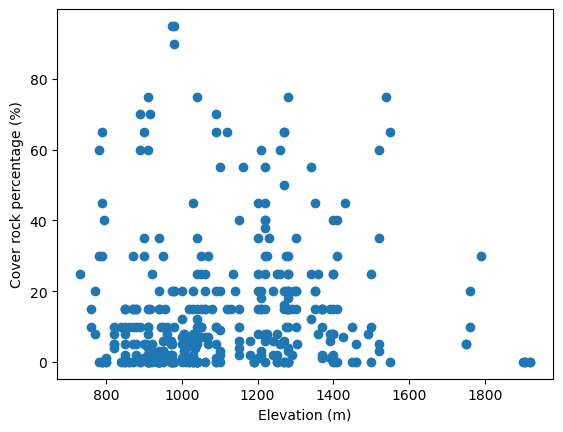

In [10]:
import matplotlib.pyplot as plt

plt.scatter(env["ELEVATION"], env["COVER_ROCK"])
plt.xlabel("Elevation (m)")
plt.ylabel("Cover rock percentage (%)")
plt.savefig("elevation_vs_cover_rock.png")


There seems to be no real significatn relationship between elevation and cover rock %

Summary statistics for totals column:
count      439.000000
mean     11288.146469
std        131.964547
min      10960.000000
25%      11188.250000
50%      11301.000000
75%      11390.550000
max      11561.000000
Name: totals, dtype: float64


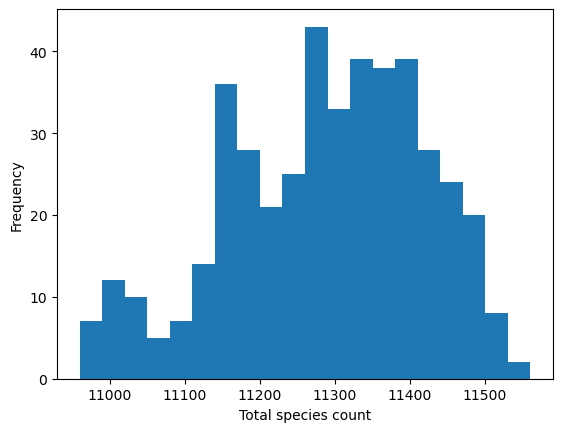

In [14]:
plt.hist(species["totals"], bins=20)
plt.xlabel("Total species count")
plt.ylabel("Frequency")
plt.savefig("species_distribution.png")

print("Summary statistics for totals column:")
print(species["totals"].describe())


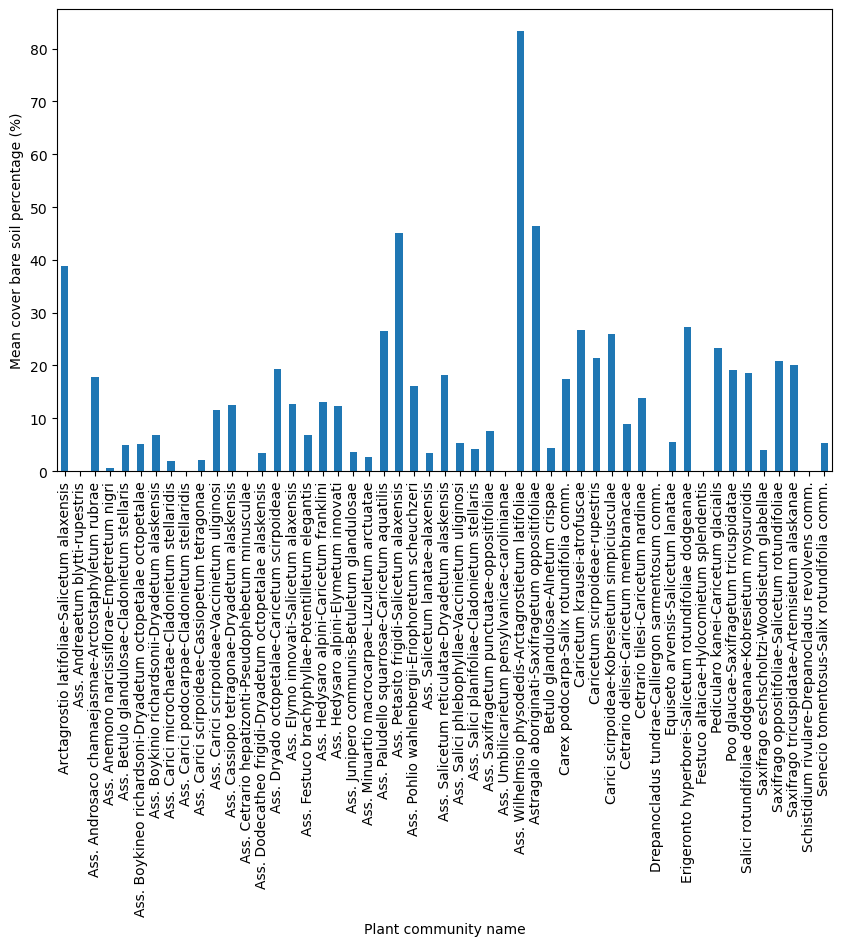

In [15]:
subset = env.loc[env["PLANT_COMMUNITY_NAME"].isin(["Caricetum scirpoideae-rupestris", "Pedicularo kanei-Caricetum glacialis", "Saxifrago tricuspidatae-Artemisietum alaskanae"])]

means = merged.groupby("PLANT_COMMUNITY_NAME")["COVER_BARE_SOIL"].mean().plot(kind="bar", figsize=(10,6))
means.plot(kind="bar")
plt.xlabel("Plant community name")
plt.ylabel("Mean cover bare soil percentage (%)")
plt.savefig("cover_bare_soil.png")


Create a figure to compare the mean cover bare soil percentage of the plant communities. Describe what the figure tells us-> are there differences among the plant communities in cover bare soil percentage? Which has the highest median value? The lowest? Are there differences in the spread among the communities? 

There are definitely pretty significant differences among the plant communities and the percentage of cover bare soil. There are a some plant species that have very low percentages and there there is a couple of species which I will point out that have super high percentages of cover base soil. The highest median values are Ass. Willhelmsio phsyodedis-Arcatagrostietum latifoliae with a mean percentage of around 80%. For the lowest there are some who have an almost zero value so I will name some of them. Schistidium rivulare-Drepanocladus revolvens comm.,Drepanocladus tundrae-Calliergon sarmentosum comm. and ASS. Umbilicarietum pensylvanicae-carolinianae. There is definitely a big difference throughout the different plant communities some as I mentioned have almost a zero % soil base cover while others have really high percentages and then there is also a good amount in the middle around the 20-30% range.